In [1]:
# Import the package if needed
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import json
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier 
warnings.filterwarnings("ignore")

In [2]:
# Define the info function to check the overall info of train data
def info(data):
    output = []

    for col in data.columns:

        nonNull  = len(data) - np.sum(pd.isna(data[col]))
        unique = data[col].nunique()
        colType = str(data[col].dtype)

        output.append([col, nonNull, unique, colType])

    output = pd.DataFrame(output)   
    output.columns = ['colName','non-null', 'unique', 'dtype']
    
    return output

In [3]:
# Import the datasets
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

# Exporatory Data Analysis

In [4]:
# To understand the dataset, show the infomation of each column
info(df_train)
# Approximately 40 millions rows of data, with no null values

colName  non-null    unique    dtype
0                 id  40428967  40428967  float64
1              click  40428967         2    int64
2               hour  40428967       240    int64
3                 C1  40428967         7    int64
4         banner_pos  40428967         7    int64
5            site_id  40428967      4737   object
6        site_domain  40428967      7745   object
7      site_category  40428967        26   object
8             app_id  40428967      8552   object
9         app_domain  40428967       559   object
10      app_category  40428967        36   object
11         device_id  40428967   2686408   object
12         device_ip  40428967   6729486   object
13      device_model  40428967      8251   object
14       device_type  40428967         5    int64
15  device_conn_type  40428967         4    int64
16               C14  40428967      2626    int64
17               C15  40428967         8    int64
18               C16  40428967         9    int64
19               C17  40428967       435    int64
20               C18  40428967         4    int64
21               C19  40428967        68    int64
22               C20  40428967       172    int64
23               C21  40428967        60    int64

In [5]:
df_train.head()

id  click      hour    C1  banner_pos   site_id site_domain  \
0  1.000009e+18      0  14102100  1005           0  1fbe01fe    f3845767   
1  1.000017e+19      0  14102100  1005           0  1fbe01fe    f3845767   
2  1.000037e+19      0  14102100  1005           0  1fbe01fe    f3845767   
3  1.000064e+19      0  14102100  1005           0  1fbe01fe    f3845767   
4  1.000068e+19      0  14102100  1005           1  fe8cc448    9166c161   

  site_category    app_id app_domain  ... device_type device_conn_type    C14  \
0      28905ebd  ecad2386   7801e8d9  ...           1                2  15706   
1      28905ebd  ecad2386   7801e8d9  ...           1                0  15704   
2      28905ebd  ecad2386   7801e8d9  ...           1                0  15704   
3      28905ebd  ecad2386   7801e8d9  ...           1                0  15706   
4      0569f928  ecad2386   7801e8d9  ...           1                0  18993   

   C15  C16   C17  C18  C19     C20  C21  
0  320   50  1722    0   35      -1   79  
1  320   50  1722    0   35  100084   79  
2  320   50  1722    0   35  100084   79  
3  320   50  1722    0   35  100084   79  
4  320   50  2161    0   35      -1  157  

[5 rows x 24 columns]

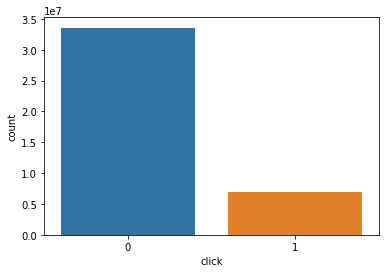

The probability that user will click the ads in average is:16.98%


In [6]:
# What is the probability user will click the ads in average?
sns.countplot(df_train['click'])
plt.show()
print("The probability that user will click the ads in average is:{:.2f}%".format((len(df_train[df_train['click'] == 1]) / len(df_train))*100))

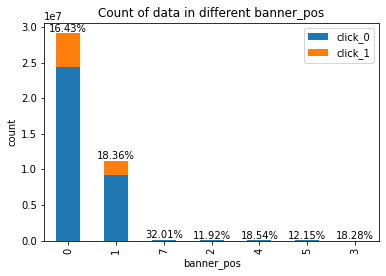

In [7]:
# How does variable 'banner_pos' affect on the ctr?

click_0 = df_train['banner_pos'][df_train['click'] == 0].value_counts()
click_1 = df_train['banner_pos'][df_train[ 'click'] == 1].value_counts()

df_tmp = pd.DataFrame({'click_0':click_0, 'click_1':click_1})

df_tmp['ctr'] = df_tmp['click_1'] / (df_tmp['click_0'] + df_tmp['click_1'])
df_tmp['ctr'] = df_tmp['ctr'].apply(lambda x: '{:.2f}%'.format(x*100))

df_tmp['total'] = df_tmp['click_0'] + df_tmp['click_1']
df_tmp = df_tmp.sort_values('total', ascending = False)

ax  = df_tmp[['click_0', 'click_1']].plot(kind = 'bar', stacked = True)

ax.set_xlabel("banner_pos")
ax.set_ylabel("count")

ax.bar_label(ax.containers[1], labels=df_tmp['ctr'], label_type='edge')

plt.title('Count of data in different banner_pos')
plt.show()

# 1. The more front position of ads, the higher the impressions and clicked times
# 2. 'banner_pos' = 7 has the highest ctr

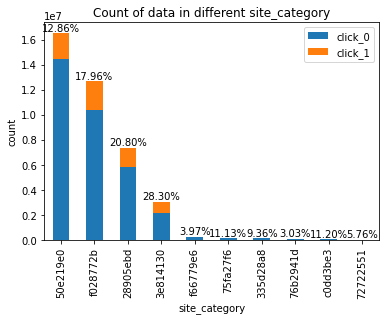

In [8]:
# What is the relationship between varible 'site_category' and ctr?
click_0 = df_train['site_category'][df_train['click'] == 0].value_counts()
click_1 = df_train['site_category'][df_train[ 'click'] == 1].value_counts()

df_tmp = pd.DataFrame({'click_0':click_0, 'click_1':click_1})

df_tmp['ctr'] = df_tmp['click_1'] / (df_tmp['click_0'] + df_tmp['click_1'])
df_tmp['ctr'] = df_tmp['ctr'].apply(lambda x: '{:.2f}%'.format(x*100))

df_tmp['total'] = df_tmp['click_0'] + df_tmp['click_1']
df_tmp = df_tmp.sort_values('total', ascending = False)[:10]

ax  = df_tmp[['click_0', 'click_1']].plot(kind = 'bar', stacked = True)

ax.set_xlabel("site_category")
ax.set_ylabel("count")

ax.bar_label(ax.containers[1], labels=df_tmp['ctr'], label_type='edge')

plt.title('Count of data in different site_category')
plt.show()

# 1. 'site_category' = '50e219e0' has highest impressions, yet the ctr is not as good as average
# 2. 'site_category' = '3e814130' has the highest ctr

#### -> We can understand that variety of input variables may affect the CTR

## Feature Engineering 

In [9]:
# To avoid the unrepresentative sample, StratifiedShuffleSplit is used
split = StratifiedShuffleSplit(n_splits=1, train_size=0.01, random_state=1)
sample_index = []
for train_index, val_index in split.split(df_train.loc[:, df_train.columns != 'click'], df_train["click"]):
    sample_index = train_index
    
df_train_sample = df_train.loc[sample_index]

In [10]:
# Check if the ctr is representive in sample train data
print("The CTR of sample data:{}".format((len(df_train_sample[df_train_sample['click'] == 1]) / len(df_train_sample))*100))
print("The CTR of original data:{}".format((len(df_train[df_train['click'] == 1]) / len(df_train))*100))

The CTR of sample data:16.980674715364504
The CTR of original data:16.980562476404604


In [11]:
# Set the test dataset as the same format as train 
# Combine two dataset for feature engineering in convenience
df_test.insert(0, 'click', 0)
df_testTrain = pd.concat([df_test, df_train_sample], copy=False)

In [12]:
print("df_test len:", len(df_test))
print("df_train_sample len:", len(df_train_sample))
print("df_testTrain:", len(df_testTrain))
df_testTrain.head()

df_test len: 4577464
df_train_sample len: 404289
df_testTrain: 4981753


click            id      hour    C1  banner_pos   site_id site_domain  \
0      0  1.000017e+19  14103100  1005           0  235ba823    f6ebf28e   
1      0  1.000018e+19  14103100  1005           0  1fbe01fe    f3845767   
2      0  1.000055e+19  14103100  1005           0  1fbe01fe    f3845767   
3      0  1.000109e+19  14103100  1005           0  85f751fd    c4e18dd6   
4      0  1.000138e+19  14103100  1005           0  85f751fd    c4e18dd6   

  site_category    app_id app_domain  ... device_type device_conn_type    C14  \
0      f028772b  ecad2386   7801e8d9  ...           1                0   8330   
1      28905ebd  ecad2386   7801e8d9  ...           1                0  22676   
2      28905ebd  ecad2386   7801e8d9  ...           1                0  22676   
3      50e219e0  51cedd4e   aefc06bd  ...           1                0  18648   
4      50e219e0  9c13b419   2347f47a  ...           1                0  23160   

   C15  C16   C17  C18  C19     C20  C21  
0  320   50   761    3  175  100075   23  
1  320   50  2616    0   35  100083   51  
2  320   50  2616    0   35  100083   51  
3  320   50  1092    3  809  100156   61  
4  320   50  2667    0   47      -1  221  

[5 rows x 24 columns]

In [13]:
# Drop Id since every row data has its unique value, this feature can not become an input variable
df_testTrain.drop(['id', 'C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19' ,'C20', 'C21'], inplace=True, axis=1)

In [14]:
info(df_testTrain)

colName  non-null   unique   dtype
0              click   4981753        2   int64
1               hour   4981753      264   int64
2         banner_pos   4981753        7   int64
3            site_id   4981753     3137  object
4        site_domain   4981753     3700  object
5      site_category   4981753       23  object
6             app_id   4981753     4554  object
7         app_domain   4981753      249  object
8       app_category   4981753       29  object
9          device_id   4981753   351118  object
10         device_ip   4981753  1267503  object
11      device_model   4981753     5704  object
12       device_type   4981753        5   int64
13  device_conn_type   4981753        4   int64

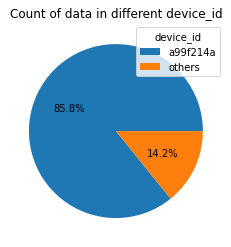

In [15]:
# 1. We can see that device_id = a99f214a are recorded 86% among all data
df_a99f214a = df_testTrain[df_testTrain['device_id'] == 'a99f214a']
df_others = df_testTrain[df_testTrain['device_id'] != 'a99f214a']
pie = plt.pie([len(df_a99f214a), len(df_others)], autopct= '%1.1f%%')
plt.legend(pie[0], title='device_id', labels = ['a99f214a', 'others'], bbox_transform=plt.gcf().transFigure)
plt.title('Count of data in different device_id')
plt.show()

In [16]:
# A new feature 'user' will be defined as this device_id, otherwise it would be device_ip + device_model, and these three features will be removed
df_testTrain['user'] = df_testTrain['device_id'].where(df_testTrain['device_id'] == 'a99f214a', df_testTrain['device_ip'] + df_testTrain['device_model'])
df_testTrain.drop(['device_id', 'device_ip', 'device_model'], inplace=True, axis=1)
df_testTrain['user'].value_counts()

a99f214a            4275291
8f500d36ad328c4d        559
ba10a8400f33af29        506
44d2ddc65db079b5        412
9e93a20bd787e91b        397
                     ...   
870b63775096d134          1
e41f3d5980b1a1d2          1
65ad1e814ea23a13          1
f31027aa84ebbcd4          1
e0dfd44943e7b962          1
Name: user, Length: 361746, dtype: int64

In [17]:
# 2. For categorical variables, to avoid decrease other features importance, only top 50 fequency feature will be one-hot encoded, others will be setted as 'others'
def saveTopFiftyFrequentDict(feature):

    feature_count = df_testTrain[feature].value_counts()
    feature_top_fifty={}
    feature_top_fifty[1] = feature_count[:50].index.values
    feature_top_fifty[0] = feature_count[50:].index.values

    feature_top_fifty_dict = {}
    for key, values in feature_top_fifty.items():
        for item in values:
            feature_top_fifty_dict[str(item)] = key

    json.dump(feature_top_fifty_dict, open("data/{}_top_fifty_dict.json".format(feature), "w"))

In [18]:
saveTopFiftyFrequentDict('site_id')
saveTopFiftyFrequentDict('site_domain')
saveTopFiftyFrequentDict('app_id')
saveTopFiftyFrequentDict('app_domain')
saveTopFiftyFrequentDict('user')

In [19]:
site_id_top_fifty_dict = json.load(open("data/site_id_top_fifty_dict.json", "r"))
site_domain_top_fifty_dict = json.load(open("data/site_domain_top_fifty_dict.json", "r"))
app_id_top_fifty_dict = json.load(open("data/app_id_top_fifty_dict.json", "r"))
app_domain_top_fifty_dict = json.load(open("data/app_domain_top_fifty_dict.json", "r"))
user_top_fifty_dict = json.load(open("data/user_top_fifty_dict.json", "r"))

df_testTrain['site_id'] = df_testTrain['site_id'].apply(lambda x: x if site_id_top_fifty_dict.get(x)==1 else "other_site_id")
df_testTrain['site_domain'] = df_testTrain['site_domain'].apply(lambda x: x if site_domain_top_fifty_dict.get(x)==1 else "other_site_domain")
df_testTrain['app_id'] = df_testTrain["app_id"].apply(lambda x: x if app_id_top_fifty_dict.get(x)==1 else "other_app_id")
df_testTrain['app_domain'] = df_testTrain['app_domain'].apply(lambda x: x if app_domain_top_fifty_dict.get(x)==1 else "other_device_model")
df_testTrain['user'] = df_testTrain['user'].apply(lambda x: x if user_top_fifty_dict.get(x)==1 else "other_user")

In [20]:
info(df_testTrain)

colName  non-null  unique   dtype
0              click   4981753       2   int64
1               hour   4981753     264   int64
2         banner_pos   4981753       7   int64
3            site_id   4981753      51  object
4        site_domain   4981753      51  object
5      site_category   4981753      23  object
6             app_id   4981753      51  object
7         app_domain   4981753      51  object
8       app_category   4981753      29  object
9        device_type   4981753       5   int64
10  device_conn_type   4981753       4   int64
11              user   4981753      51  object

In [21]:
# 3. For the time variable, we consider ctr might be related to day or hour
df_testTrain = df_testTrain.rename(columns={'hour': 'date_tmp'})
df_testTrain['day'] = np.round(df_testTrain['date_tmp'] % 10000 / 100)
df_testTrain['hour'] = np.round(df_testTrain['date_tmp'] % 100)

df_testTrain.drop('date_tmp', inplace=True, axis=True)

In [22]:
df_testTrain['day'].unique()

array([31., 22., 24., 21., 26., 28., 23., 27., 25., 29., 30.])

In [23]:
df_testTrain

click  banner_pos        site_id        site_domain site_category  \
0             0           0  other_site_id  other_site_domain      f028772b   
1             0           0       1fbe01fe           f3845767      28905ebd   
2             0           0       1fbe01fe           f3845767      28905ebd   
3             0           0       85f751fd           c4e18dd6      50e219e0   
4             0           0       85f751fd           c4e18dd6      50e219e0   
...         ...         ...            ...                ...           ...   
16688545      0           1  other_site_id  other_site_domain      3e814130   
36906637      0           0       85f751fd           c4e18dd6      50e219e0   
25784930      0           0  other_site_id  other_site_domain      50e219e0   
1740445       0           0       85f751fd           c4e18dd6      50e219e0   
23577132      0           0  other_site_id  other_site_domain      f028772b   

                app_id app_domain app_category  device_type  device_conn_type  \
0             ecad2386   7801e8d9     07d7df22            1                 0   
1             ecad2386   7801e8d9     07d7df22            1                 0   
2             ecad2386   7801e8d9     07d7df22            1                 0   
3             51cedd4e   aefc06bd     0f2161f8            1                 0   
4             9c13b419   2347f47a     f95efa07            1                 0   
...                ...        ...          ...          ...               ...   
16688545      ecad2386   7801e8d9     07d7df22            1                 0   
36906637  other_app_id   2347f47a     0f2161f8            1                 0   
25784930      ecad2386   7801e8d9     07d7df22            0                 0   
1740445       9c13b419   2347f47a     f95efa07            1                 0   
23577132      ecad2386   7801e8d9     07d7df22            1                 2   

                user   day  hour  
0           a99f214a  31.0     0  
1           a99f214a  31.0     0  
2           a99f214a  31.0     0  
3           a99f214a  31.0     0  
4           a99f214a  31.0     0  
...              ...   ...   ...  
16688545    a99f214a  25.0     0  
36906637    a99f214a  30.0     4  
25784930  other_user  27.0    14  
1740445     a99f214a  21.0     8  
23577132    a99f214a  26.0    20  

[4981753 rows x 13 columns]

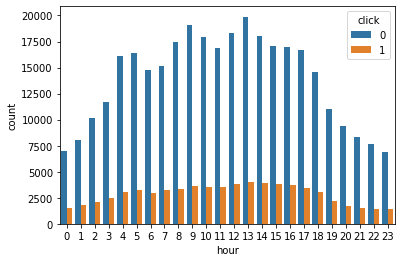

In [24]:
# We found that impressions are more frequent during daytime
sns.countplot(x="hour", hue="click",data=df_testTrain[len(df_test):])
plt.show()

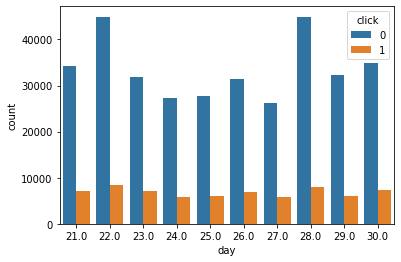

In [25]:
sns.countplot(x="day", hue="click",data=df_testTrain[len(df_test):])
plt.show()

In [26]:
info(df_testTrain)

colName  non-null  unique    dtype
0              click   4981753       2    int64
1         banner_pos   4981753       7    int64
2            site_id   4981753      51   object
3        site_domain   4981753      51   object
4      site_category   4981753      23   object
5             app_id   4981753      51   object
6         app_domain   4981753      51   object
7       app_category   4981753      29   object
8        device_type   4981753       5    int64
9   device_conn_type   4981753       4    int64
10              user   4981753      51   object
11               day   4981753      11  float64
12              hour   4981753      24    int64

In [27]:
df_testTrain

click  banner_pos        site_id        site_domain site_category  \
0             0           0  other_site_id  other_site_domain      f028772b   
1             0           0       1fbe01fe           f3845767      28905ebd   
2             0           0       1fbe01fe           f3845767      28905ebd   
3             0           0       85f751fd           c4e18dd6      50e219e0   
4             0           0       85f751fd           c4e18dd6      50e219e0   
...         ...         ...            ...                ...           ...   
16688545      0           1  other_site_id  other_site_domain      3e814130   
36906637      0           0       85f751fd           c4e18dd6      50e219e0   
25784930      0           0  other_site_id  other_site_domain      50e219e0   
1740445       0           0       85f751fd           c4e18dd6      50e219e0   
23577132      0           0  other_site_id  other_site_domain      f028772b   

                app_id app_domain app_category  device_type  device_conn_type  \
0             ecad2386   7801e8d9     07d7df22            1                 0   
1             ecad2386   7801e8d9     07d7df22            1                 0   
2             ecad2386   7801e8d9     07d7df22            1                 0   
3             51cedd4e   aefc06bd     0f2161f8            1                 0   
4             9c13b419   2347f47a     f95efa07            1                 0   
...                ...        ...          ...          ...               ...   
16688545      ecad2386   7801e8d9     07d7df22            1                 0   
36906637  other_app_id   2347f47a     0f2161f8            1                 0   
25784930      ecad2386   7801e8d9     07d7df22            0                 0   
1740445       9c13b419   2347f47a     f95efa07            1                 0   
23577132      ecad2386   7801e8d9     07d7df22            1                 2   

                user   day  hour  
0           a99f214a  31.0     0  
1           a99f214a  31.0     0  
2           a99f214a  31.0     0  
3           a99f214a  31.0     0  
4           a99f214a  31.0     0  
...              ...   ...   ...  
16688545    a99f214a  25.0     0  
36906637    a99f214a  30.0     4  
25784930  other_user  27.0    14  
1740445     a99f214a  21.0     8  
23577132    a99f214a  26.0    20  

[4981753 rows x 13 columns]

In [28]:
# Encode the categorical variable and create dummies features
encoder = preprocessing.LabelEncoder() 
features = ['banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_type', 'device_conn_type', 'user', 'day', 'hour']
df_testTrain_new = df_testTrain
for feature in features:
    df_testTrain[feature] = encoder.fit_transform(df_testTrain[feature])
    dummies_feature_category = pd.get_dummies(df_testTrain[feature], prefix = feature)
    df_testTrain_new = pd.concat([df_testTrain_new, dummies_feature_category], axis=1)

In [29]:
df_testTrain_new.drop(features, inplace=True, axis=1)
df_testTrain_new

click  banner_pos_0  banner_pos_1  banner_pos_2  banner_pos_3  \
0             0             1             0             0             0   
1             0             1             0             0             0   
2             0             1             0             0             0   
3             0             1             0             0             0   
4             0             1             0             0             0   
...         ...           ...           ...           ...           ...   
16688545      0             0             1             0             0   
36906637      0             1             0             0             0   
25784930      0             1             0             0             0   
1740445       0             1             0             0             0   
23577132      0             1             0             0             0   

          banner_pos_4  banner_pos_5  banner_pos_6  site_id_0  site_id_1  ...  \
0                    0             0             0          0          0  ...   
1                    0             0             0          0          0  ...   
2                    0             0             0          0          0  ...   
3                    0             0             0          0          0  ...   
4                    0             0             0          0          0  ...   
...                ...           ...           ...        ...        ...  ...   
16688545             0             0             0          0          0  ...   
36906637             0             0             0          0          0  ...   
25784930             0             0             0          0          0  ...   
1740445              0             0             0          0          0  ...   
23577132             0             0             0          0          0  ...   

          hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  \
0               0        0        0        0        0        0        0   
1               0        0        0        0        0        0        0   
2               0        0        0        0        0        0        0   
3               0        0        0        0        0        0        0   
4               0        0        0        0        0        0        0   
...           ...      ...      ...      ...      ...      ...      ...   
16688545        0        0        0        0        0        0        0   
36906637        0        0        0        0        0        0        0   
25784930        1        0        0        0        0        0        0   
1740445         0        0        0        0        0        0        0   
23577132        0        0        0        0        0        0        1   

          hour_21  hour_22  hour_23  
0               0        0        0  
1               0        0        0  
2               0        0        0  
3               0        0        0  
4               0        0        0  
...           ...      ...      ...  
16688545        0        0        0  
36906637        0        0        0  
25784930        0        0        0  
1740445         0        0        0  
23577132        0        0        0  

[4981753 rows x 359 columns]

In [30]:
# Export both data to csv
df_train_new = df_testTrain_new.iloc[len(df_test):,]
df_train_new.to_csv('Data/df_train_new.csv')

In [31]:
df_test_new = df_testTrain_new.iloc[:len(df_test),]
df_test_new.to_csv('Data/df_test_new.csv')

In [32]:
df_train_new

click  banner_pos_0  banner_pos_1  banner_pos_2  banner_pos_3  \
6442340       0             1             0             0             0   
14358030      1             1             0             0             0   
2448506       0             0             1             0             0   
23823328      0             1             0             0             0   
29536614      0             1             0             0             0   
...         ...           ...           ...           ...           ...   
16688545      0             0             1             0             0   
36906637      0             1             0             0             0   
25784930      0             1             0             0             0   
1740445       0             1             0             0             0   
23577132      0             1             0             0             0   

          banner_pos_4  banner_pos_5  banner_pos_6  site_id_0  site_id_1  ...  \
6442340              0             0             0          0          0  ...   
14358030             0             0             0          0          0  ...   
2448506              0             0             0          0          0  ...   
23823328             0             0             0          0          0  ...   
29536614             0             0             0          0          0  ...   
...                ...           ...           ...        ...        ...  ...   
16688545             0             0             0          0          0  ...   
36906637             0             0             0          0          0  ...   
25784930             0             0             0          0          0  ...   
1740445              0             0             0          0          0  ...   
23577132             0             0             0          0          0  ...   

          hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  \
6442340         0        0        0        0        0        0        0   
14358030        0        0        0        0        0        0        0   
2448506         0        0        0        0        0        0        0   
23823328        0        0        0        0        0        0        0   
29536614        0        0        0        0        0        0        0   
...           ...      ...      ...      ...      ...      ...      ...   
16688545        0        0        0        0        0        0        0   
36906637        0        0        0        0        0        0        0   
25784930        1        0        0        0        0        0        0   
1740445         0        0        0        0        0        0        0   
23577132        0        0        0        0        0        0        1   

          hour_21  hour_22  hour_23  
6442340         0        0        0  
14358030        0        0        0  
2448506         0        0        0  
23823328        0        0        1  
29536614        0        0        0  
...           ...      ...      ...  
16688545        0        0        0  
36906637        0        0        0  
25784930        0        0        0  
1740445         0        0        0  
23577132        0        0        0  

[404289 rows x 359 columns]

In [33]:
df_train_new.head()

click  banner_pos_0  banner_pos_1  banner_pos_2  banner_pos_3  \
6442340       0             1             0             0             0   
14358030      1             1             0             0             0   
2448506       0             0             1             0             0   
23823328      0             1             0             0             0   
29536614      0             1             0             0             0   

          banner_pos_4  banner_pos_5  banner_pos_6  site_id_0  site_id_1  ...  \
6442340              0             0             0          0          0  ...   
14358030             0             0             0          0          0  ...   
2448506              0             0             0          0          0  ...   
23823328             0             0             0          0          0  ...   
29536614             0             0             0          0          0  ...   

          hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  \
6442340         0        0        0        0        0        0        0   
14358030        0        0        0        0        0        0        0   
2448506         0        0        0        0        0        0        0   
23823328        0        0        0        0        0        0        0   
29536614        0        0        0        0        0        0        0   

          hour_21  hour_22  hour_23  
6442340         0        0        0  
14358030        0        0        0  
2448506         0        0        0  
23823328        0        0        1  
29536614        0        0        0  

[5 rows x 359 columns]

In [34]:
df_train_new

click  banner_pos_0  banner_pos_1  banner_pos_2  banner_pos_3  \
6442340       0             1             0             0             0   
14358030      1             1             0             0             0   
2448506       0             0             1             0             0   
23823328      0             1             0             0             0   
29536614      0             1             0             0             0   
...         ...           ...           ...           ...           ...   
16688545      0             0             1             0             0   
36906637      0             1             0             0             0   
25784930      0             1             0             0             0   
1740445       0             1             0             0             0   
23577132      0             1             0             0             0   

          banner_pos_4  banner_pos_5  banner_pos_6  site_id_0  site_id_1  ...  \
6442340              0             0             0          0          0  ...   
14358030             0             0             0          0          0  ...   
2448506              0             0             0          0          0  ...   
23823328             0             0             0          0          0  ...   
29536614             0             0             0          0          0  ...   
...                ...           ...           ...        ...        ...  ...   
16688545             0             0             0          0          0  ...   
36906637             0             0             0          0          0  ...   
25784930             0             0             0          0          0  ...   
1740445              0             0             0          0          0  ...   
23577132             0             0             0          0          0  ...   

          hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  \
6442340         0        0        0        0        0        0        0   
14358030        0        0        0        0        0        0        0   
2448506         0        0        0        0        0        0        0   
23823328        0        0        0        0        0        0        0   
29536614        0        0        0        0        0        0        0   
...           ...      ...      ...      ...      ...      ...      ...   
16688545        0        0        0        0        0        0        0   
36906637        0        0        0        0        0        0        0   
25784930        1        0        0        0        0        0        0   
1740445         0        0        0        0        0        0        0   
23577132        0        0        0        0        0        0        1   

          hour_21  hour_22  hour_23  
6442340         0        0        0  
14358030        0        0        0  
2448506         0        0        0  
23823328        0        0        1  
29536614        0        0        0  
...           ...      ...      ...  
16688545        0        0        0  
36906637        0        0        0  
25784930        0        0        0  
1740445         0        0        0  
23577132        0        0        0  

[404289 rows x 359 columns]

# Model Training

In [82]:
X = df_train_new.iloc[:,1:]
y = df_train_new.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
# Define the Logarithmic Loss function for evaluating the submissions
def logloss(y_true, y_pred, eps=1e-15):
    import numpy as np

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    assert (len(y_true) and len(y_true) == len(y_pred))

    p = np.clip(y_pred, eps, 1-eps)
    loss = np.sum(- y_true * np.log(p) - (1 - y_true) * np.log(1-p))

    return loss / len(y_true)

In [95]:
# Decide which solver to use
lr_solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
best_solver = ''
best_logloss_score = 1
for solver in lr_solvers:
    lr = LogisticRegression(solver=solver)
    lr.fit(X_train.to_numpy(), y_train.to_numpy())
    y_pred = lr.predict_proba(X_test.to_numpy())
    logloss_score = logloss(y_test, y_pred[:,1])
    print('Solver {} score: {}'.format(solver, logloss_score))
    
    if logloss_score < best_logloss_score:
        best_solver = solver
        best_logloss_score = logloss_score

Solver newton-cg score: 0.4153090996894171
Solver lbfgs score: 0.4154713927869927
Solver liblinear score: 0.41531207240825674
Solver sag score: 0.415309035112584
Solver saga score: 0.4153091052272046


In [103]:
lr = LogisticRegression(solver=best_solver)
lr.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = lr.predict_proba(X_test.to_numpy())
logloss_score = logloss(y_test, y_pred[:,1])
print('Logloss of lr with same weight:', logloss_score)

Logloss of lr with same weight: 0.4153090077988825


In [105]:
lr = LogisticRegression(solver=best_solver, class_weight='balanced')
lr.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = lr.predict_proba(X_test.to_numpy())
logloss_score = logloss(y_test, y_pred[:,1])
print('Logloss of lr with balanced weight:', logloss_score)

Logloss of lr with balanced weight: 0.6382512484033104


In [111]:
from sklearn.linear_model import SGDClassifier

In [91]:
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3, loss='log_loss')
                    )
clf.fit(X_train, y_train)
clf_y_predict = clf.predict_proba(X_test.to_numpy())[:,1]
logloss(y_test, clf_y_predict)

0.4270274012040559

In [ ]:
logloss(y_train, x_train)

In [ ]:
# Make new Submission
def newSubmission(df):
    df_newSubmission = pd.read_csv('Data/sampleSubmission.csv')
    df_newSubmission.drop(columns = 'click', inplace = True)
    df_newSubmission['click'] = y_pred[1]

    df_newSubmission = df_newSubmission.reset_index(drop=True)
    df_newSubmission.to_csv('Data/newSubmission.csv', index=False)

In [ ]:
df_newSubmission

In [92]:
rfr = RandomForestRegressor()

NameError: name 'RandomForestRegressor' is not defined